# Assess Huntington's disease progression from PET/MR images

In [1]:
import itertools
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns

import hd_classifier

sns.set_style("whitegrid")

## Inflammation assesment using PBR scans

### Participants information

In [2]:
participants_df = pd.read_csv('data/participants.tsv', delimiter='\t')
participants_df

,subject_id,group,neurological_score,intracraneal_volume
0,sub-control01,control,None,1720386.090
1,sub-control02,control,None,1294547.181
2,sub-control03,control,None,1719868.263
3,sub-patient01,pre-HD,12,1691144.459
4,sub-patient02,HD,11,1620931.350
5,sub-patient03,HD,11,1623384.994
6,sub-patient04,HD,6,1311833.976
7,sub-patient05,HD,6,1609140.746
8,sub-patient06,HD,8,1407048.267
9,sub-patient07,HD,9,1709589.314


We also set some colors for the groups.

In [3]:
subject_colors = {'HD': 'r', 'pre-HD': 'g', 'control': 'b'}

### Principal component analysis

We extract all voxels for each subject and region directly from the nifti images and the masks generated from Freesurfer.

We use principal component analysis to transform each subject into the vector space spanned by the eigenvectors of the covariance matrix. The plots show the components along each axis in this subspace for each patient. The axis are ordered according to the value of the eigenvectors.

We choose a few statistical quantities to describe each region

In [4]:
q_1 = lambda x: np.percentile(x, q=25)
q_3 = lambda x: np.percentile(x, q=75)

features = {'value' : {'min' : np.min, 'max' : np.max, 'mean' : np.mean, 
                       'q_1' : q_1, 'median' : np.median, 'q_3' : q_3 }} 

Extract the voxel data, calculate statistical features for all regions and subjects, and put them into a `pd.DataFrame`.

In [5]:
path_to_tracer_data = './data/func'
items = os.listdir(path_to_tracer_data)

subjects = hd_classifier.make_subjects(items, path_to_tracer_data)
image_filter = '^r.*\.lin_T1_orientOK_skullstripped_norm_sm6mm.nii'

masked_region_df_pbr, masked_region_features_pbr = hd_classifier.extract_features(subjects, features, image_filter)
masked_region_features_pbr

value                                                    \
                    q_1                                  median             
region          caudate  pallidum   putamen  thalamus   caudate  pallidum   
subject_id                                                                  
sub-control01 -1.388645 -1.041978 -1.465006 -1.009029 -1.371238 -1.100063   
sub-control02  1.189939 -1.055070 -1.791744  0.174739  0.139610 -1.052815   
sub-control03  0.650746 -1.009498 -0.872760 -0.262299  0.075484 -1.035254   
sub-patient01  0.558051 -0.963738 -0.493779  0.575087  0.081254 -0.988546   
sub-patient02 -0.684377 -1.033959  0.459495 -1.116379 -0.646753 -0.951295   
sub-patient03 -0.823267  0.601186  0.254308  0.739702 -0.575776  0.656898   
sub-patient04 -1.757525  0.769227  0.468411 -1.451417 -1.686101  0.617699   
sub-patient05  0.266911  1.392979  0.783543 -0.845015  0.701969  1.285287   
sub-patient06  0.218085  0.941838  0.756744  0.784329  0.773433  0.757604   
sub-patient07  0.898925  0.587796  0.676923  1.662186  0.894274  1.062689   
sub-patient08  0.871157  0.811217  1.223864  0.748095  1.613843  0.747797   

                                                         ...               \
                                        q_3              ...         mean   
region          putamen  thalamus   caudate  pallidum    ...      putamen   
subject_id                                               ...                
sub-control01 -1.507881 -1.478227 -1.616657 -1.113403    ...    -1.444357   
sub-control02 -1.670587 -0.432989 -0.723117 -1.069600    ...    -1.605643   
sub-control03 -0.922347 -0.284565 -0.255073 -1.077115    ...    -1.034525   
sub-patient01 -0.535757  0.578981 -0.362234 -0.911905    ...    -0.589593   
sub-patient02  0.375043 -0.870593 -0.279856 -0.890109    ...     0.309722   
sub-patient03  0.278429  0.503713 -0.138449  0.564049    ...     0.218796   
sub-patient04  0.666189 -1.031814 -1.024050  0.636320    ...     0.684176   
sub-patient05  0.891214 -0.548981  1.032284  1.192734    ...     0.930972   
sub-patient06  0.650896  1.054176  0.727474  0.704761    ...     0.672437   
sub-patient07  0.473395  1.789661  0.849571  1.343183    ...     0.567761   
sub-patient08  1.301405  0.720638  1.790107  0.621085    ...     1.290253   

                                                                           \
                              min                                     max   
region         thalamus   caudate  pallidum   putamen  thalamus   caudate   
subject_id                                                                  
sub-control01 -1.582814 -0.487224 -1.289685 -0.673849 -0.273970 -1.156807   
sub-control02 -0.070012  2.080915 -1.220226  0.054220  1.679413 -0.385848   
sub-control03 -0.170595  1.136230 -1.172718 -1.785771  1.061215 -1.457192   
sub-patient01  0.791888  0.498454 -0.564674 -0.624247  0.778891 -0.671197   
sub-patient02 -0.872325 -0.300367 -0.771185  0.624905  0.273293 -1.179469   
sub-patient03  0.245012 -0.496733  0.904794 -1.409627 -0.358875  0.531420   
sub-patient04 -1.268869 -0.746638  0.532832  0.836033 -2.027563  1.062449   
sub-patient05 -0.444915 -0.774267  1.189695  0.540556 -0.319915  1.131696   
sub-patient06  0.945525 -0.725815  1.060045  0.190859 -0.022810  0.351262   
sub-patient07  1.640877  0.870835  0.540394  0.991441  0.171954  1.169288   
sub-patient08  0.786228 -1.055391  0.790730  1.255482 -0.961633  0.604398   

                                             
                                             
region         pallidum   putamen  thalamus  
subject_id                                   
sub-control01 -1.340185 -1.062503 -1.811230  
sub-control02 -0.754262 -0.937932 -0.655259  
sub-control03 -1.176873 -1.397507 -0.648369  
sub-patient01 -0.952919 -1.017771 -0.143775  
sub-patient02 -0.491114 -0.370960 -0.363833  
sub-patient03  0.038973 -0.081619 -0.565003  
sub-patient04  0.624437  0.828155  0.855029  
sub-patient05  0.893293  0.943949  0.659728 

Calculate the principal component rotated basis

In [6]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(masked_region_features_pbr.as_matrix())

rotated_subjects_pbr = pca.fit_transform(masked_region_features_pbr.as_matrix())

pca_results = pd.DataFrame(dict(first_feature=rotated_subjects_pbr[:,0],
                         second_feature=rotated_subjects_pbr[:,1],
                         subject_id = masked_region_features_pbr.index.values))

pca_results.sort_values(by='first_feature', inplace=True)
pca_results.reset_index(drop=True, inplace=True)

pca_results = pca_results.merge(participants_df[['subject_id', 'group']], on='subject_id')
pca_results

,first_feature,second_feature,subject_id,group
0,-1.605982,1.086153,sub-control01,control
1,-1.173386,-1.136890,sub-control02,control
2,-1.104548,-0.853542,sub-control03,control
3,-0.581117,-0.982097,sub-patient01,pre-HD
4,-0.573659,0.651267,sub-patient02,HD
5,0.249114,0.364780,sub-patient03,HD
6,0.340194,2.108002,sub-patient04,HD
7,1.014150,0.578197,sub-patient05,HD
8,1.037755,-0.323771,sub-patient06,HD
9,1.197809,-1.121216,sub-patient07,HD


In [7]:
# Make a list with all the name features as region_feature to label the plots. E.g. thalamus_min
pca_features = [(item[1] + ' ' + item[0]).title() 
                for item in itertools.product(list(masked_region_features_pbr.columns.levels[1]),                         
                                              list(masked_region_features_pbr.columns.levels[2]))]

# Get the coefficient of each feature for the first 3 principal axis
transformed_features = sorted(zip(pca_features, *pca.components_[0:4]), key=lambda t: t[0])

Let's order the data according to the score in the plot above.

In [8]:
masked_region_df_pbr['subject_id'] = pd.Categorical(masked_region_df_pbr['subject_id'], pca_results.subject_id)

Just a couple of features classify inflammation in patients vs controls. Even only one feature, classifies the subjects in at least two groups

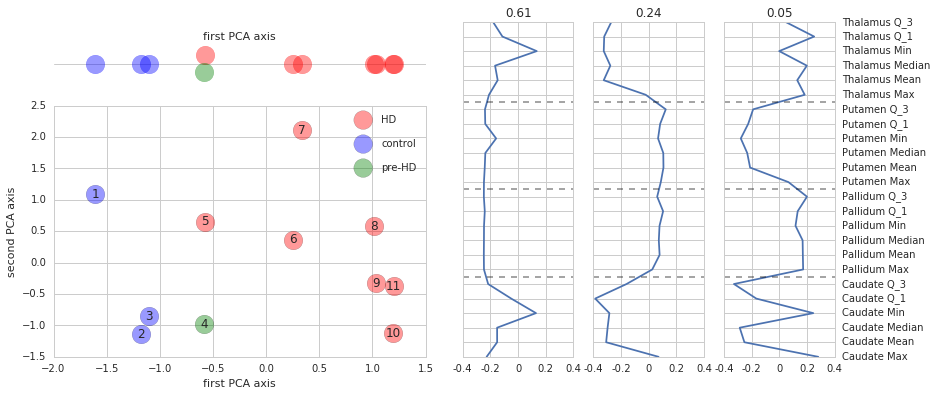

In [9]:
# Some values overlap in the final plot, so we add some ad-hoc jittering
jitters = np.zeros(11)
jitters[3] = -.03
jitters[4] = .03

joined = pca_results.join(pd.DataFrame(dict(jitters=jitters)))
groups = joined.groupby('group')

fig = plt.figure(figsize=(14, 6))

outer_grid = gridspec.GridSpec(1, 2, wspace=0.1, width_ratios=[4,4])

right_plot = gridspec.GridSpecFromSubplotSpec(2, 1,
            subplot_spec=outer_grid[0], hspace=0, height_ratios=[1,3])

marker_size = 350
# plot the first and second components in a scatter plot
ax = plt.Subplot(fig, right_plot[1])  
for name, items in groups:
    ax.scatter(items.first_feature, items.second_feature, s=marker_size, alpha=0.4, 
               c=subject_colors[name], label=name)

for idx in range(len(pca_results.index)):
    ax.text(pca_results.first_feature[idx], pca_results.second_feature[idx], str(idx+1), 
            horizontalalignment='center', verticalalignment='center')
ax.set_xlabel('first PCA axis')
ax.set_ylabel('second PCA axis')
ax.legend(labelspacing=1.4)
fig.add_subplot(ax)

# plot the first component in a line on top
ax_top = plt.Subplot(fig, right_plot[0])
for name, items in groups:
    ax_top.scatter(items.first_feature, items.jitters, s=marker_size, alpha=0.4, 
               color=subject_colors[name], label=name)

ax_top.set_xticks([])
ax_top.set_yticks([0])
ax_top.set_yticklabels([])
ax_top.set_ylabel('')
ax_top.xaxis.set_label_coords(0.5, 0.88)
ax_top.set_xlabel('first PCA axis')
ax_top.set(xlim=ax.get_xlim())
for sp in ax_top.spines.values(): sp.set_visible(False)
fig.add_subplot(ax_top)

# plot the eigenvectors in the original feature space
number_of_components = 3
number_of_features = len(transformed_features)

left_plot = gridspec.GridSpecFromSubplotSpec(1, number_of_components,
            subplot_spec=outer_grid[1], wspace=0.18)

for i in range(number_of_components):
    ax = plt.Subplot(fig, left_plot[i])  
    ax.plot([item[i+1] if i != 0 else -item[i+1] for item in transformed_features], list(range(number_of_features)))
    ax.set_title(round(pca.explained_variance_ratio_[i],2))
    ax.set(xlim=(-.4, .4))
    ax.set(ylim=(0, number_of_features-1))
    ax.set_yticks(list(range(number_of_features)))
    ax.set_yticklabels([item[0] for item in transformed_features] if i==2 else [])
    ax.yaxis.tick_right()
    ax.set_xticks([-0.4, -.2, 0, .2, 0.4])
    ax.set_xticklabels([-0.4, -0.2, 0, 0.2, 0.4])
    for i in range(0,4):
        ax.axhline(y=5.5+6*i, ls='dashed', c='black', alpha=0.4)
    
    fig.add_subplot(ax)

fig.savefig('results/figs/pca_analysis.pdf', format='pdf') 

### Region of interest analysis

/home/ivan/anaconda3/envs/huntington-with-pbr28/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


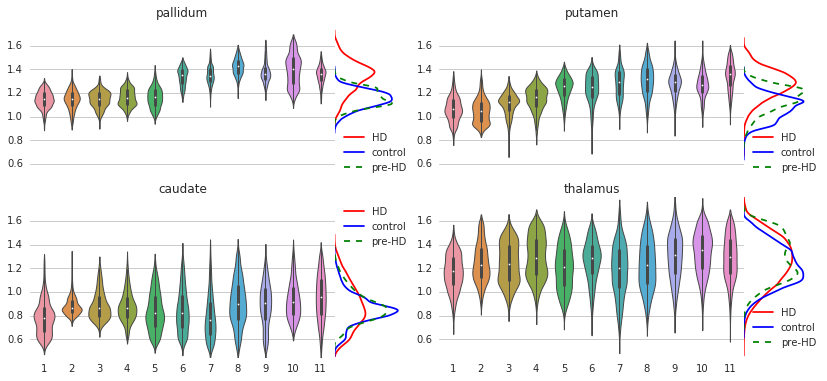

In [10]:
merged = masked_region_df_pbr.merge(pca_results[['group', 'subject_id', 'first_feature']], on='subject_id')
merged.sort_values(by='first_feature', inplace=True)
merged.reset_index(drop=True, inplace=True)

regions = ['pallidum', 'putamen', 'caudate', 'thalamus']
region_data = list(map(lambda r: merged[merged['region'] == r], regions))

def plot_roi_histograms(data, ax, ax_hist):
    sns.violinplot(data=data, x="subject_id", y="value", bw=.2, 
                   scale='count', cut=1, linewidth=1, ax=ax)
    groups = data.groupby('group')
    for name, group in groups:
        sns.kdeplot(group['value'], vertical=True, ax=ax_hist,
                    label=name, color=subject_colors[name],
                    ls=('--' if name=='pre-HD' else '-'))

fig = plt.figure(figsize=(14, 6))

# gridspec inside gridspec
outer_grid = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.1)

for i in range(4):
    inner_grid = gridspec.GridSpecFromSubplotSpec(1, 2,
            subplot_spec=outer_grid[i], wspace=0.0, hspace=0.0, width_ratios=[9,2],)
    ax = plt.Subplot(fig, inner_grid[0])  

    ax_hist = plt.Subplot(fig, inner_grid[1])
    plot_roi_histograms(region_data[i], ax, ax_hist)
    ax.set_title(regions[i])
    ax.set(ylim=(masked_region_df_pbr['value'].min(), masked_region_df_pbr['value'].max()))
    ax_hist.set(ylim=(masked_region_df_pbr['value'].min(), masked_region_df_pbr['value'].max()))

    ax.set_yticks([0.6, 0.8, 1, 1.2, 1.4, 1.6])
    # show only xticklabels only for the lower plots and show the patient number instead of subject_id
    if i in [0,1]:
        ax.set_xticks([])
    else:
        ax.set_xticklabels(list(range(1, len(merged)+1)))
    ax_hist.set_xticks([])
    ax_hist.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    fig.add_subplot(ax)
    fig.add_subplot(ax_hist)

all_axes = fig.get_axes()

#show only the outside spines
for ax in all_axes:
    for sp in ax.spines.values():
        sp.set_visible(False)
        
plt.savefig('results/figs/regions_of_interest_pbr.pdf', format='pdf')  

We can assess the difference between the distributions above using a permutation test. We compare the distributions for the control and HD for each region using the mean and the median of each subject as input.

In [11]:
def bipartition_means_difference(seq, size_l, size_r):
    '''
    Calculate the difference between the averages of a sequence bipartition
    
    Parameters
    ==========
    seq: numpy array like object
    size_l: int size of the left part
    size_r: int size of the right part
    '''
    if len(seq) != size_l + size_r:
        raise Exception('Not a bipartition')
        
    np.random.shuffle(seq)
    left = seq[:size_l]
    right = seq[-size_r:]
    return (left.mean() - right.mean())

def permutatation_test(z, y, num_samples):
    '''
    Calculate the p-value for a permutation test with num_samples
    
    Parameters
    ==========
    z: numpy array like object with one group of observations
    y: numpy array like object with another group of observations
    num_samples: int with the number of samples 
    '''
    pooled = np.hstack([z,y])
    delta = z.mean() - y.mean()
    
    estimates = map(lambda x: bipartition_means_difference(pooled, z.size, y.size), 
                    range(num_samples))
    count = len(list(filter(lambda x: x > delta, estimates)))
    
    return 1.0 - float(count)/float(num_samples)

num_samples = 100000

for stat in ['median', 'mean']:
        
    print('Permutations test p-values using the {0} as input'.format(stat))

    for region in regions:
        controls = np.array(masked_region_features_pbr['value'][stat][region][:3])
        hd = np.array(masked_region_features_pbr['value'][stat][region][4:])

        print (region, permutatation_test(controls, hd, num_samples))

Permutations test p-values using the median as input
pallidum 0.00770000000000004
putamen 0.006770000000000054
caudate 0.24387999999999999
thalamus 0.09750000000000003
Permutations test p-values using the mean as input
pallidum 0.005770000000000053
putamen 0.008380000000000054
caudate 0.23068999999999995
thalamus 0.15735


### Correlation between caudate volumes and inflammation

The volume of each region as it has a lot of variability, even among subjects with similar disease progression. We normalize the volumes and show the correlations between the value of the classifier for inflammation

In [12]:
region_volumes = masked_region_df_pbr.groupby(['subject_id', 'region']).agg('count').unstack()
# Pretty ugly fix: no time to do something smarter
region_volumes.columns = [' '.join(col).strip().split(' ')[1] for col in region_volumes.columns.values]

intracraneal_volume_df = participants_df[['subject_id', 'intracraneal_volume']].set_index('subject_id')

merged = region_volumes.join(intracraneal_volume_df)
merged = merged.div(merged.intracraneal_volume, axis='index')

normalized_region_volumes = hd_classifier.normalize(merged)
normalized_region_volumes.drop('intracraneal_volume', axis=1, inplace=True)

to_fit = normalized_region_volumes.join(pca_results[['first_feature', 'subject_id', 'group']].set_index('subject_id'))
to_fit

,caudate,pallidum,putamen,thalamus,first_feature,group
subject_id,,,,,,
sub-control01,0.717007,0.877372,0.249519,-0.444604,-1.605982,control
sub-control02,1.970432,1.320113,1.595470,1.482615,-1.173386,control
sub-control03,1.009887,1.494377,1.049931,1.121932,-1.104548,control
sub-patient01,0.283714,0.851308,1.376849,1.336164,-0.581117,pre-HD
sub-patient02,0.480351,0.054755,0.441168,-0.365928,-0.573659,HD
sub-patient03,-0.992005,-1.026772,-0.615731,-0.322699,0.249114,HD
sub-patient04,-0.793641,-1.308350,-1.056920,0.646955,0.340194,HD
sub-patient05,0.092074,-0.716890,-0.750696,-0.984323,1.014150,HD
sub-patient06,-0.838448,-0.824493,-0.252867,-0.770944,1.037755,HD


/home/ivan/anaconda3/envs/huntington-with-pbr28/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     18.82
Date:                Fri, 26 Aug 2016   Prob (F-statistic):            0.00188
Time:                        15:31:27   Log-Likelihood:                -8.8768
No. Observations:                  11   AIC:                             21.75
Df Residuals:                       9   BIC:                             22.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const         -5.204e-16      0.181  -2.88e-15

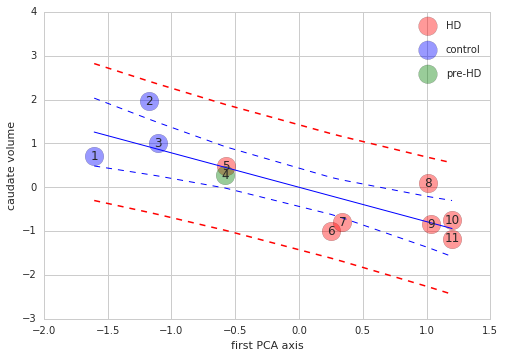

In [13]:
from statsmodels.stats.outliers_influence import summary_table
import statsmodels.api as sm

x = to_fit.first_feature
y = to_fit['caudate'].values
X = sm.add_constant(x)

re = sm.OLS(y, X).fit()
print(re.summary())

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

plt.plot(x, fittedvalues, 'b-', lw=1)
plt.plot(x, predict_ci_low, 'r--', lw=1.5)
plt.plot(x, predict_ci_upp, 'r--', lw=1.5)
plt.plot(x, predict_mean_ci_low, 'b--', lw=1)
plt.plot(x, predict_mean_ci_upp, 'b--', lw=1)

# You don't neeed this if you do the relative caudates
#labels = [str(i+1) if i not in (3,4) else str('4,5') for i in range(len(x))]
#labels[4] = ''
#labels = [str(i+1) for i in range(len(x))]

#plt.scatter(x[:3], y[:3], s=marker_size, alpha=0.4, c='b', label='control')
#plt.scatter(x[3], y[3], s=marker_size, alpha=0.4, c='g', label='pre-HD')
#plt.scatter(x[4:], y[4:], s=marker_size, alpha=0.4, c='r', label='HD')

#for i in range(len(x)):
#    plt.text(x[i], y[i], labels[i], 
#            horizontalalignment='center', verticalalignment='center')

groups = to_fit.groupby('group')

for name, items in groups:
    plt.scatter(items.first_feature, items.caudate, s=marker_size, alpha=0.4, 
               c=subject_colors[name], label=name)

for idx in range(len(to_fit)):
    plt.text(x[idx], y[idx], str(idx+1), 
            horizontalalignment='center', verticalalignment='center')

plt.xlabel('first PCA axis')
plt.ylabel('caudate volume')
plt.legend(labelspacing=1.4)
plt.savefig('results/figs/region_volumes_vs_inflammation_scores.pdf', format='pdf') 

### Thalamic nuclei analysis

In [14]:
from functools import reduce
from nilearn.image import resample_to_img, new_img_like
from nilearn.masking import apply_mask

def merge_nuclei_masks(nuclei, nuclei_masks, imgs):
    
    #print("Making a mask with nuclei: " + str(nuclei))
    
    masks_to_join = []
    for k in nuclei:
        resampled = resample_to_img(nuclei_masks[k], imgs[0])
        masks_to_join.append(resampled.get_data() > 0.5)

    joint_mask_data_as_bool = reduce(np.logical_or, masks_to_join) 
    joint_mask_as_bool = new_img_like(imgs[0], joint_mask_data_as_bool)
    try: 
        masked_motor_nuclei = apply_mask(imgs, joint_mask_as_bool)
        #return masked_motor_nuclei, np.sum(joint_mask_data_as_bool)
        return masked_motor_nuclei
    except:
        raise Exception('bad thing')

def find_threshold(imgs, q):
    from math import floor
    parts = []
    for img in imgs:
        threshold_index = floor(q * len(img))
        parts.append(np.partition(img, threshold_index)[threshold_index:])
    merged = np.concatenate(parts)
    merged_threshold = floor (1- len(merged) / len(parts))
    return np.partition(merged, merged_threshold)[merged_threshold]

Get the images in MNI space, instead of subject space, so we can use the atlas, and then apply all the masks in the atlas to each of the subject's MNI images. The result is a dictionary `masked_imgs` with the masked images for each nuclei and patient.

We have stored the `masked_imgs` in a `.pickle` file, because the license of the Morel atlas does not allow redistribution. If you have a [licensed copy of the Morel atlas](http://www.lead-dbs.org/?page_id=45), you can generate the data yourself, using the code below. 

In [15]:
def make_masked_nuclei_imgs(imgs, path_to_morel_atlas, excludes):
    
    left_volumes = glob.glob(os.path.join(path_to_morel_atlas, 'left-vols-1mm/*.nii.gz'))
    right_volumes = glob.glob(os.path.join(path_to_morel_atlas,'right-vols-1mm/*.nii.gz'))

    def parse_nuclei_name(vol):
        return os.path.dirname(vol).split('/')[-1].split('-')[0] + '_' + os.path.basename(vol).split('.')[0]

    nuclei_mask_dict = { parse_nuclei_name(vol) : vol 
                         for vol in left_volumes + right_volumes 
                         if not ''.join(parse_nuclei_name(vol).split('_')[1:]).startswith(tuple(excludes)) }

    nuclei_masks = { k: nib.load(v) for k, v in nuclei_mask_dict.items() }
    masked_img = {}
    nuclei_sizes = {}

    for k, v in nuclei_masks.items():
        resampled = resample_to_img(v, imgs[0])
        resampled_data_as_bool = resampled.get_data() > 0.5
        nuclei_sizes[k] = np.sum(resampled_data_as_bool)
        resampled_as_bool = new_img_like(resampled, resampled_data_as_bool)
        try: 
            masked_img[k] = apply_mask(imgs, resampled_as_bool)
        except:
            print('Something is wrong for nucleus ', k)
            continue
            
    return masked_img, nuclei_sizes

In [16]:
path_to_tracer_data = './data/func'
items = os.listdir(path_to_tracer_data)

subjects = hd_classifier.make_subjects(items, path_to_tracer_data)
mni_image_filter = 'nl_MNI152_norm_sm6mm.nii'

subjects.sort(key=lambda s: pca_results[pca_results['subject_id']==s.subject_id].index.tolist()[0])

assert ([s.subject_id for s in subjects] == list(pca_results['subject_id']))

mni_images = map(lambda s: hd_classifier.find_masks(s.images, mni_image_filter), subjects)
imgs = [nib.load(image) for image in list(itertools.chain.from_iterable(mni_images))]

In [17]:
import pickle

pickled_masked_nuclei_imgs = './results/masked_nuclei_imgs.pickle'

if os.path.isfile(pickled_masked_nuclei_imgs):
    with open(pickled_masked_nuclei_imgs, 'rb') as f:
        nuclei_masks = pickle.load(f)
else:
    path_to_morel_atlas = './data/private/Atlas/Morel'
    excluded_nuclei = [] # = ['global', 'MAX']
    masked_img = make_masked_nuclei_imgs(imgs, path_to_morel_atlas, excluded_nuclei)
    
    with open(pickled_masked_nuclei_imgs, 'wb') as f:
        pickle.dump(masked_img, f, pickle.HIGHEST_PROTOCOL)

Plot the histogram of uptake for each relevant nuclei and subject. For the remaining nuclei in the Morel Atlas differences between controls and patients are not as marked as for those selected. The vertical lines are a guide ot the eye and mark the value of SUVR corresponding to the 95 percentile of all voxels in the control group.

In [18]:
relevant_nuclei_group_names = ['left_VLpv', 'left_PuL', 'left_VApc']
relevant_nuclei_groups = { k: [it for it in list(nuclei_masks.keys()) if k in it] for k in relevant_nuclei_group_names }

masked_relevant_groups = {k: merge_nuclei_masks(v, nuclei_masks, imgs) for k, v in relevant_nuclei_groups.items()}

fig = plt.figure(figsize=(10, 7))

# gridspec two split all patients and averages
outer_grid = gridspec.GridSpec(1, len(masked_relevant_groups), wspace=0.09, hspace=0)

min_x, max_x = 0.4, 2
pallete = sns.color_palette("hls", 11)
grey_shadow = '#857e7e'

for j, (k, v) in enumerate(masked_relevant_groups.items()):   

    column_grid = gridspec.GridSpecFromSubplotSpec(11, 1,
                subplot_spec=outer_grid[j], wspace=0, hspace=0.0)

    for i in range(0,11):
        
        threshold = find_threshold(masked_img[k][:3], 0.90)
        
        ax = plt.Subplot(fig, column_grid[i])  
        ax.set(xlim=(min_x, max_x))
        if i == 0: ax.set_title(k)
        if i == 10:
            ax.set_xticks([min_x, threshold, max_x])
            ax.set_xticklabels([min_x, round(threshold, 2), max_x])
        else:
            ax.set_xticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xlabel('')
        if j == 0: 
            ax.set_ylabel(str(i+1), rotation='horizontal')
            
        ax.axvline(x=threshold, color=grey_shadow, ls=':')
        sns.kdeplot(v[i], shade=True, color=pallete[i], # use the same colors as before to identify subjects
                    ax=ax)
        if 'left_PuL' in k:
            sns.kdeplot(masked_img['right_PuL'][i], shade=True, color=grey_shadow, ax=ax)
        sns.kdeplot(masked_img['left_global'][i], ls='--', ax=ax, color=grey_shadow)        
        
        fig.add_subplot(ax)      

plt.savefig('results/figs/nuclei.pdf', format='pdf')  

NameError: name 'nuclei_masks' is not defined